<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [3]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

In [4]:
df = pd.read_csv('C:/Users/User/Downloads/world-happiness-report-2019.csv')

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [5]:
df.head(10)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41,10,2,5,4.0,47,22.0,27.0
1,Denmark,2,13,24,26,4,6,3.0,22,14.0,23.0
2,Norway,3,8,16,29,3,3,8.0,11,7.0,12.0
3,Iceland,4,9,3,3,1,7,45.0,3,15.0,13.0
4,Netherlands,5,1,12,25,15,19,12.0,7,12.0,18.0
5,Switzerland,6,11,44,21,13,11,7.0,16,8.0,4.0
6,Sweden,7,18,34,8,25,10,6.0,17,13.0,17.0
7,New Zealand,8,15,22,12,5,8,5.0,8,26.0,14.0
8,Canada,9,23,18,49,20,9,11.0,14,19.0,8.0
9,Austria,10,10,64,24,31,26,19.0,25,16.0,15.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

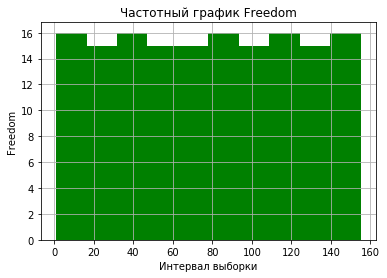

In [6]:
n, bins, patches = plt.hist(df['Freedom'], facecolor='g')

plt.xlabel('Интервал выборки')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom')
plt.grid(True)
plt.show()

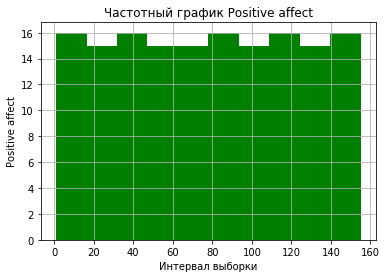

In [7]:
n, bins, patches = plt.hist(df['Positive affect'], facecolor='g')

plt.xlabel('Интервал выборки')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect')
plt.grid(True)
plt.show()

In [41]:
#Оба графика имеют нормальным распределением

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [8]:
print('Медиана для Freedom: ', statistics.median(df['Freedom']))
print('Математическое ожидание по выборке(общее для сравниваемых распределений) : %s'%str(round(np.mean(df['Freedom']))))
print('Стандартное отклонение для Freedom: ', statistics.pstdev(df['Freedom']))
print('Дисперсия для Freedom: ', statistics.pvariance(df['Freedom']))
print('Минимум для Freedom: ', min(df['Freedom']))
print('Максимум для Freedom: ', max(df['Freedom']))
print('Размах для Freedom: ', max(df['Freedom']) - min(df['Freedom']))

Медиана для Freedom:  78
Математическое ожидание по выборке(общее для сравниваемых распределений) : 78.0
Стандартное отклонение для Freedom:  44.74371464239419
Дисперсия для Freedom:  2002
Минимум для Freedom:  1
Максимум для Freedom:  155
Размах для Freedom:  154


In [9]:
print('Значение моды для Freedom:: ', statistics.mode(df['Freedom']))

StatisticsError: no unique mode; found 155 equally common values

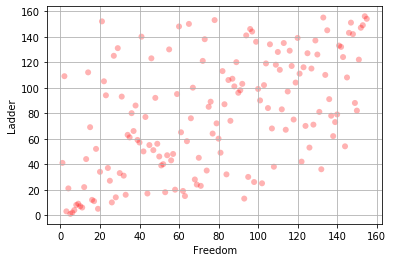

In [10]:
#ищем выбросы

duration = df['Freedom']
year = df['Ladder']
fig, ax = plt.subplots()
ax.scatter(duration, year, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Ladder')
plt.show()

In [ ]:
#Из графика можно сделать вывод, что явных выбросов нет

Почему нельзя найти моду?

In [0]:
Потому что в данной колонке все значения уникальные и одинаковых не встречается

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

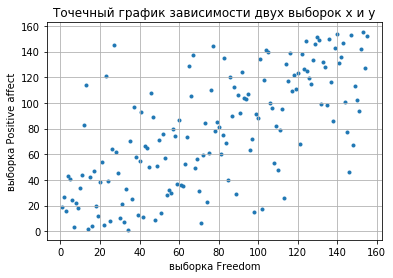

In [11]:
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(df['Freedom'], df['Positive affect'], marker='.')

In [12]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(df['Freedom'], df['Positive affect'])
print('Коэффициент пирсона:', corr)

Коэффициент пирсона: 0.6817698430601656


In [ ]:
#Знак коэффициента (положительный) говорит о том, что корреляция прямая и изменении переменных Freedom и Positive affect идёт в одинаковых направлениях

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [13]:
Freedom_1 = df['Freedom'] - statistics.mean(df['Freedom'])
print(statistics.mean(Freedom_1))

print(min(Freedom_1))
print(max(Freedom_1))

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['Freedom']])
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

0
-77
77


,0
0,0.025974
1,0.032468
2,0.012987
3,0.038961
4,0.116883


In [14]:
Freedom_2 = min_max_scaler.fit_transform(np.array(df['Freedom']).reshape(-1, 1))
print(min(Freedom_2))
print(max(Freedom_2))

[0.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

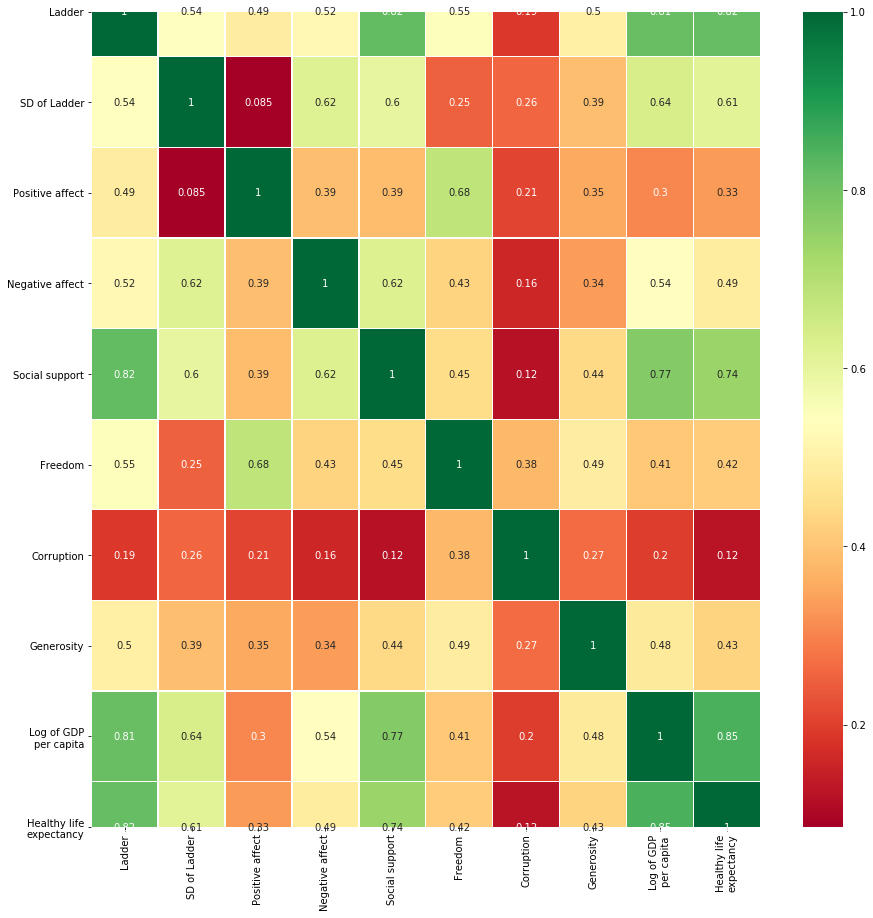

In [18]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

Загрузить таблицу цен на авокадо: 

In [19]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

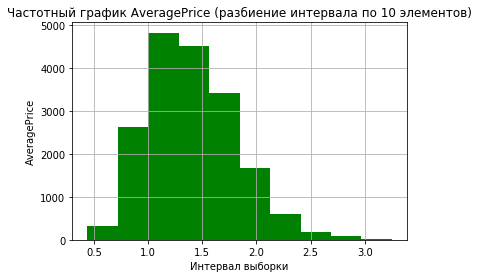

In [23]:
n, bins, patches = plt.hist(df['AveragePrice'], 10, facecolor='g')

plt.xlabel('Интервал выборки')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

In [ ]:
#Данный частотный график схож с нормальным распределением с некоторыми отклонениями

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [53]:
print('Корреляция между колонками 4046 и Average Price: ', df['4046'].corr(df['AveragePrice']))
print('Корреляция между колонками 4225 и Average Price: ', df['4225'].corr(df['AveragePrice']))
print('Корреляция между колонками 4770 и Average Price: ', df['4770'].corr(df['AveragePrice']))

Корреляция между колонками 4046 и Average Price:  -0.2083170484878849
Корреляция между колонками 4225 и Average Price:  -0.17292777250933547
Корреляция между колонками 4770 и Average Price:  -0.179445983979756


In [54]:
#Корреляция во всех случаях обратная и слабая. Т.к. корреляция обратная, то можно сделать вывод, что при увеличении средней цены значение колонок 4046, 4225, 4770 в большинстве случаем будет уменьшаться, и наоборт, при уменьшении средней цены - увеличиваться